# Data exploration notebook

In [60]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import pathlib
from base64 import b64encode, b64decode

### Notes

**Dataset V2** [![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.12628195.svg)](https://doi.org/10.5281/zenodo.12628195)
- **general** 
    - ~85 000 data points
- **cluster_id**
    - most of them are consecutive numbers, but there are some gaps    
- **key_concepts**
    - about 500 (0.6%) data points with NaNs, the number of articles for these data points is very low < 120

More details in the notebook...

## Constants

In [61]:
BASIC_DATA_PATH = pathlib.Path('..', 'data', 'map_of_science' , 'basic_data.jsonl') 

## Loading data

In [62]:
def load_to_json(path):
    with open(path, 'r') as f:
        data = "[" + ",".join(f.readlines()) + "]"
        data = json.loads(data)
    return data

def load_to_df(path):
    data = load_to_json(path)
    df = pd.DataFrame(data)
    return df

In [63]:
dj = load_to_json(BASIC_DATA_PATH)
dj[0]

{'cluster_id': 84872,
 'key_concepts': ['historical performance practice',
  'Don Juan',
  'Baroque music',
  'English virginal music',
  'English Baroque performance'],
 'num_recent_articles': 228,
 'cluster_category': 'humanities',
 'growth_rating': 15.43,
 'x': -90.2114,
 'y': -71.396}

## General exploration

In [65]:
len(dj)

85643

In [66]:
df = load_to_df(BASIC_DATA_PATH)
df

cluster_id                                       key_concepts  \
0           84872  [historical performance practice, Don Juan, Ba...   
1           72062  [Early Modern Art, John Singleton Copley, Scot...   
2           62380  [Malay gamelan music, folk music, Music Theory...   
3           65319  [Rite of Spring, Indonesian piano music, piano...   
4           72024  [Mediterranean Marine Caves, Marine Caves, mar...   
...           ...                                                ...   
85638        6047  [Tissue Engineering, cell culture, Cell Cultur...   
85639         129  [graphene oxide, Reduced Graphene, Functionali...   
85640       41756  [OLED display, crystalline oxide semiconductor...   
85641         213  [chemical vapor deposition, CVD graphene films...   
85642         151  [anode materials, silicon anode, lithium-ion b...   

       num_recent_articles   cluster_category  growth_rating         x  \
0                      228         humanities          15.43  -90.2114   
1                      239         humanities           3.22  -76.1376   
2                      283         humanities          33.33 -160.4460   
3                      242         humanities           3.11  -78.1228   
4                      104            biology          74.75  -45.6533   
...                    ...                ...            ...       ...   
85638                  686  materials science          52.10  320.7678   
85639                 1982  materials science          33.59  230.4844   
85640                  376  materials science          44.26  168.4628   
85641                 1651  materials science          19.63   98.1491   
85642                 3359  materials science          62.57  252.1484   

              y  
0      -71.3960  
1      -37.2588  
2       20.6144  
3      -68.1877  
4      178.6693  
...         ...  
85638  181.4553  
85639  350.5407  
85640  392.2027  
85641  416.9048  
85642  375.5727  

[85643 rows x 7 columns]

### Exploring NaNs

In [67]:
df.isna().sum()

cluster_id               0
key_concepts           429
num_recent_articles      0
cluster_category         0
growth_rating            0
x                        0
y                        0
dtype: int64

In [68]:
df[df["key_concepts"].isna()]

cluster_id key_concepts  num_recent_articles  cluster_category  \
15          52466         None                    9           biology   
366         74732         None                   19           biology   
600         82411         None                    7           biology   
736         65846         None                   22     earth science   
947         19498         None                    6        humanities   
...           ...          ...                  ...               ...   
84683       72136         None                    8          medicine   
84757       28749         None                    5          medicine   
84907       72269         None                   14    social science   
85098       67911         None                    9  computer science   
85489       10810         None                    7           biology   

       growth_rating         x         y  
15             99.78  195.0308  394.3122  
366            93.75  -78.1425   85.7866  
600            83.25  171.2409  402.9979  
736            85.83  -87.0852  213.5406  
947            83.25  -65.7771  -15.6593  
...              ...       ...       ...  
84683          98.30  221.1207  -38.9697  
84757          98.43   69.8440 -138.4609  
84907          37.78  414.2931  177.7681  
85098          99.96   41.8268 -180.6496  
85489          95.36  220.9814 -143.4869  

[429 rows x 7 columns]

In [72]:
sorted(df[df["key_concepts"].isna()]["num_recent_articles"].to_list())

[1,
 1,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,


### Fixing NaNs

In [17]:
df.loc[df["key_concepts"].isna(), "key_concepts"] = ''

In [16]:
df.isna().sum()

cluster_id               0
key_concepts           429
num_recent_articles      0
cluster_category         0
growth_rating            0
x                        0
y                        0
dtype: int64

In [ ]:
df["key_concepts"][0]

['historical performance practice',
 'Don Juan',
 'Baroque music',
 'English virginal music',
 'English Baroque performance']

## Using Plotly

In [18]:
import plotly.express as px

fig = px.scatter(
    df, 
    x="x", 
    y="y",
	size="growth_rating", 
    color="cluster_category",
    hover_name="cluster_id", 
    log_x=False, 
    size_max=6, 
    width=800, 
    height=800)

fig.show()

### Saving to HTML

In [ ]:
fig.write_html("data_plotly.html")

## Matplotlib

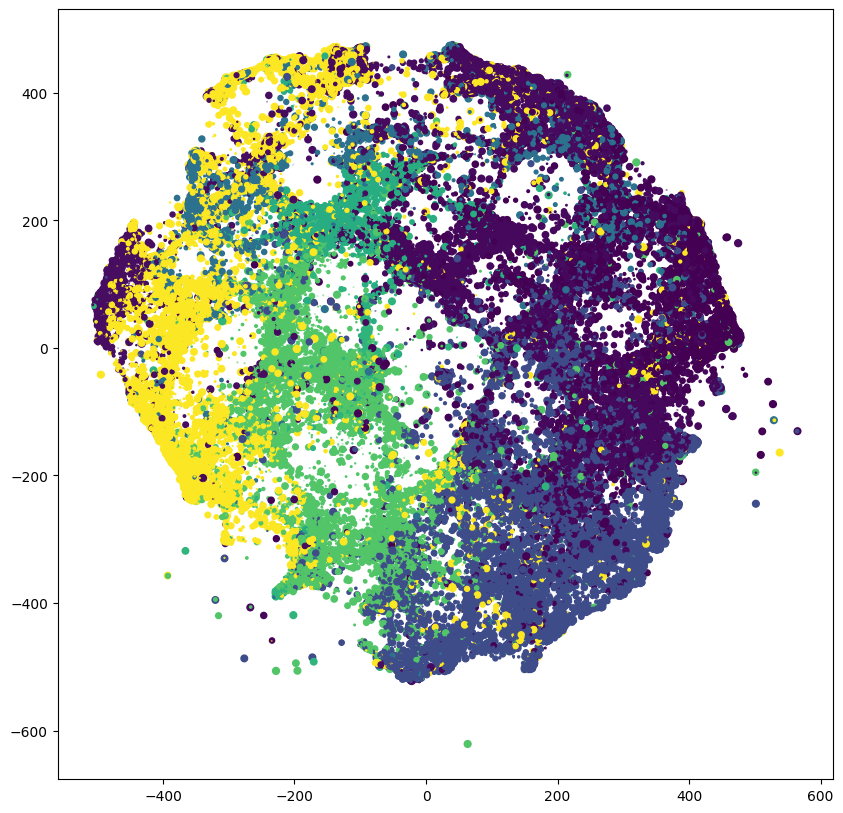

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(
    df["x"], 
    df["y"], 
    c=[hash(v) for v in df["cluster_category"]], 
    s=df["growth_rating"] ** 2 / 100,
    cmap='viridis', 
    marker='.')

## cluster_id exploration

In [74]:
ids = df['cluster_id']

In [75]:
min(ids), max(ids), len(ids), len(set(ids))

(0, 86787, 85643, 85643)

In [23]:
for id0, id1 in enumerate(sorted(ids)):
    if id0 != id1:
        print(id0, id1)


1140 1141
1141 1142
1142 1143
1143 1144
1144 1145
1145 1146
1146 1147
1147 1148
1148 1149
1149 1150
1150 1151
1151 1152
1152 1153
1153 1154
1154 1155
1155 1156
1156 1157
1157 1158
1158 1159
1159 1160
1160 1161
1161 1162
1162 1163
1163 1164
1164 1165
1165 1166
1166 1167
1167 1168
1168 1169
1169 1170
1170 1171
1171 1172
1172 1173
1173 1174
1174 1175
1175 1176
1176 1177
1177 1178
1178 1179
1179 1180
1180 1181
1181 1182
1182 1183
1183 1184
1184 1185
1185 1186
1186 1187
1187 1188
1188 1189
1189 1190
1190 1191
1191 1192
1192 1193
1193 1194
1194 1195
1195 1196
1196 1197
1197 1198
1198 1199
1199 1200
1200 1201
1201 1202
1202 1203
1203 1204
1204 1205
1205 1206
1206 1207
1207 1208
1208 1209
1209 1210
1210 1211
1211 1212
1212 1213
1213 1214
1214 1215
1215 1216
1216 1217
1217 1218
1218 1219
1219 1220
1220 1221
1221 1222
1222 1223
1223 1224
1224 1225
1225 1226
1226 1227
1227 1228
1228 1229
1229 1230
1230 1231
1231 1232
1232 1233
1233 1234
1234 1235
1235 1236
1236 1237
1237 1238
1238 1239
1239 1240


## cluster_category exploration

In [24]:
categories = sorted(df["cluster_category"].unique().tolist())
categories

['biology',
 'chemistry',
 'computer science',
 'earth science',
 'engineering',
 'humanities',
 'materials science',
 'mathematics',
 'medicine',
 'physics',
 'social science']

cluster_category
medicine             17707
social science       14625
biology              10920
computer science      9493
chemistry             8026
materials science     6633
physics               5553
engineering           4291
mathematics           3492
earth science         3409
humanities            1494
Name: count, dtype: int64


<AxesSubplot:xlabel='cluster_category'>

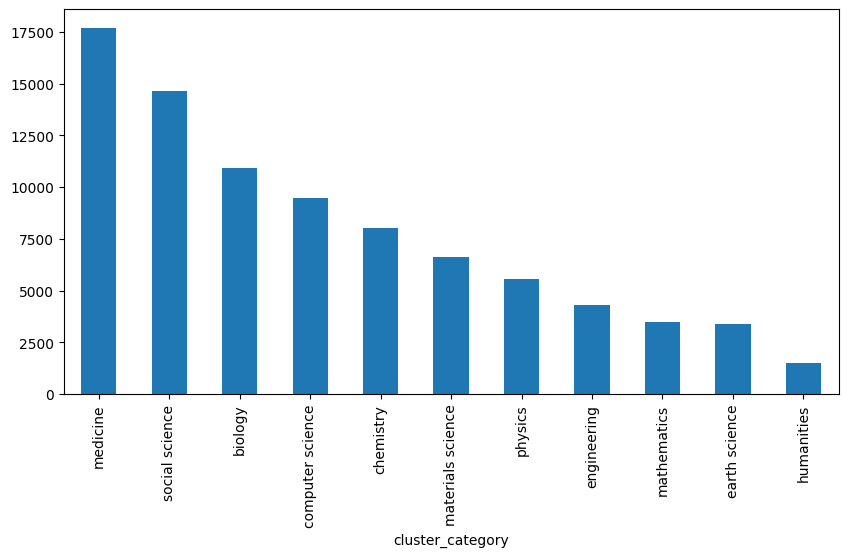

In [25]:
print(df["cluster_category"].value_counts())
df["cluster_category"].value_counts().plot(kind='bar', figsize=(10, 5))

In [26]:
CATEGORY_TO_INT = {category: idx for idx, category in enumerate(categories)}
INT_TO_CATEGORY = {idx: category for idx, category in enumerate(categories)}

In [27]:
CATEGORY_TO_INT

{'biology': 0,
 'chemistry': 1,
 'computer science': 2,
 'earth science': 3,
 'engineering': 4,
 'humanities': 5,
 'materials science': 6,
 'mathematics': 7,
 'medicine': 8,
 'physics': 9,
 'social science': 10}

In [28]:
INT_TO_CATEGORY

{0: 'biology',
 1: 'chemistry',
 2: 'computer science',
 3: 'earth science',
 4: 'engineering',
 5: 'humanities',
 6: 'materials science',
 7: 'mathematics',
 8: 'medicine',
 9: 'physics',
 10: 'social science'}

## key_concepts exploration

In [49]:
concepts = sorted(set(list([key for group in df["key_concepts"] for key in group])))
concepts

['12-20210031',
 '1790-1920',
 '19-9 levels',
 '1‒3 November',
 '2012-13 French pill',
 '2012-2013 Central African',
 '2018-2020 Period',
 '25-6981',
 '2950:1974 Brown coal',
 '4,4′',
 'A-Ring Substituted Anthraquinone',
 'A-Site Cation Ordering',
 'A-Site Columnar-Ordered Quadruple',
 'A-induced Liver Injury',
 'A-induced autoimmune hepatitis',
 'A-kinase anchor protein',
 'A-kinase anchoring protein',
 'A-kinase interacting protein',
 'A-level geology',
 'A-level scenic spots',
 'A-numerical radius',
 'A-sandwich radome',
 'A-separable modules',
 'A-share listed companies',
 'A-site non-stoichiometry',
 'A-site spinel',
 'A-type PACs',
 'A-type carbonate',
 'A-type cost factors',
 'A-type lamins',
 'A.chinensis adults',
 'AAA',
 'AAA Annual Meeting',
 'AAA formation',
 'AAA growth',
 'AAA growth rate',
 'AAA patients',
 'AAA repair',
 'AAA rupture',
 'AAC',
 'AAC concrete production',
 'AAC intervention',
 'AAC research',
 'AAC system',
 'AAC system performance',
 'AAC systems',
 'AA

In [50]:
len(concepts)

274420

In [52]:
concepts_dup = sorted(list(list([key for group in df["key_concepts"] for key in group])))
len(concepts_dup)

425789

In [53]:
dfc = pd.DataFrame(concepts_dup)
dfc.value_counts()

0                        
cancer cells                 1048
mechanical properties         619
compounds                     441
mental health                 437
Google Scholar                422
                             ... 
Oxidation End Products          1
Oxidation Induction Time        1
Oxidation behavior              1
Oxidation kinetics              1
ℚ-Fano threefolds defined       1
Name: count, Length: 274420, dtype: int64

In [59]:
sum(dfc.value_counts() == 1), sum(dfc.value_counts() != 1)

(237325, 37095)

In [117]:
chr(1000).encode("utf-8")

b'\xcf\xa8'

In [119]:
b'\xcf\xa8'.decode("utf-8")

1000

In [136]:
CONCEPT_TO_IDX = {concept: idx for idx, concept in enumerate(concepts)}
IDX_TO_CONCEPT = {idx: concept for idx, concept in enumerate(concepts)}

In [137]:
CONCEPT_TO_IDX

{'12-20210031': 0,
 '1790-1920': 1,
 '19-9 levels': 2,
 '1‒3 November': 3,
 '2012-13 French pill': 4,
 '2012-2013 Central African': 5,
 '2018-2020 Period': 6,
 '25-6981': 7,
 '2950:1974 Brown coal': 8,
 '4,4′': 9,
 'A-Ring Substituted Anthraquinone': 10,
 'A-Site Cation Ordering': 11,
 'A-Site Columnar-Ordered Quadruple': 12,
 'A-induced Liver Injury': 13,
 'A-induced autoimmune hepatitis': 14,
 'A-kinase anchor protein': 15,
 'A-kinase anchoring protein': 16,
 'A-kinase interacting protein': 17,
 'A-level geology': 18,
 'A-level scenic spots': 19,
 'A-numerical radius': 20,
 'A-sandwich radome': 21,
 'A-separable modules': 22,
 'A-share listed companies': 23,
 'A-site non-stoichiometry': 24,
 'A-site spinel': 25,
 'A-type PACs': 26,
 'A-type carbonate': 27,
 'A-type cost factors': 28,
 'A-type lamins': 29,
 'A.chinensis adults': 30,
 'AAA': 31,
 'AAA Annual Meeting': 32,
 'AAA formation': 33,
 'AAA growth': 34,
 'AAA growth rate': 35,
 'AAA patients': 36,
 'AAA repair': 37,
 'AAA rupt